<a href="https://colab.research.google.com/github/ClaraContiero/Faculdade/blob/main/An%C3%A1lise_da_Base_de_Dados_California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = yellow>  **T1 - Trabalho 1 - Estatística Descritiva - Análise Exploratória de Dados**

**Nomes dos integrantes do Grupo**

In [ ]:
# Membro 1: Isabella de Lima Anacleto - RA: 23906670
# Membro 2: Maria Clara Carneiro Contiero - RA: 23916406

## **Bibliotecas básicas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## **Importe o dataset California Housing Prices**

- **Execute o comando abaixo para clonar o arquivo do Github na pasta de arquivos ao lado**

In [ ]:
!git clone https://github.com/MiroPlacido/Datasets.git

Cloning into 'Bases-de-Dados'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 2), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 613.75 KiB | 6.97 MiB/s, done.
Resolving deltas: 100% (2/2), done.


- **Abra o arquivo clonado na pasta de arquivos ao lado**

In [ ]:
df = pd.read_csv("Datasets/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- **O dataset também está disponível no Canvas, com o nome de $housing$**

### **Contexto**

Os dados referem-se às casas encontradas em um determinado distrito da Califórnia e a algumas estatísticas resumidas sobre elas com base nos dados do censo de 1990.

### **Variáveis**


**1°) longitude**: Uma medida do Oeste de uma casa. Um valor mais negativo está mais a Oeste (neste caso, a medida refere-se ao distrito).

**2°) latitude**: Uma medida do Norte mais alto de uma casa; um valor maior é mais ao Norte (neste caso, a medida refere-se ao distrito).

**3°) housing_median_age**: Idade mediana de uma casa em um distrito. Um número menor é um edifício mais recente.

**4°) total_rooms**: Número total de salas em um distrito.

**5°) total_bedrooms**: Número total de quartos em um distrito.

**6°) population**: Número total de pessoas que residem em um distrito.

**7°) households**: Número total de residências, um grupo de pessoas que moram em uma unidade residencial, um distrito.

**8°) median_income**: Renda mediana para famílias em um distrito (medida em dezenas de milhares de dólares americanos).

🏠 **9°) median_house_value**: Valor mediano da casa para casas em um distrito (medido em dólares americanos):

**10°) ocean_proximity**: Próximidade do oceano.

### **Objetivo**

Investigar a variável valor mediano da casa e suas relações com as demais variáveis.

# **Estatística Univariada da Variável Preço Mediano da Casa**

Nesta seção, o grupo deve analisar isoladamente a variável preço mediano da casa. Faça análises baseadas nos conhecimentos da Unidade 1. Remova outliers considerando um dos critérios da Unidade 1. Escreva algumas conclusões/informações estatísticas relevantes encontradas nessa análise.

O que devemos calcular:

- Média
- Moda
- Mediana
- Desvio Padrão
- Quartis
- Percentis
- Boxplot
- Histograma
- Identificar outliers (usando o boxplot)

----

In [ ]:
# Informações gerais sobre a base de dados
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


> Cálculos sobre o ***median_house_value*** antes de remover os outliers:



In [ ]:
valor_casa = df['median_house_value']
valor_casa

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

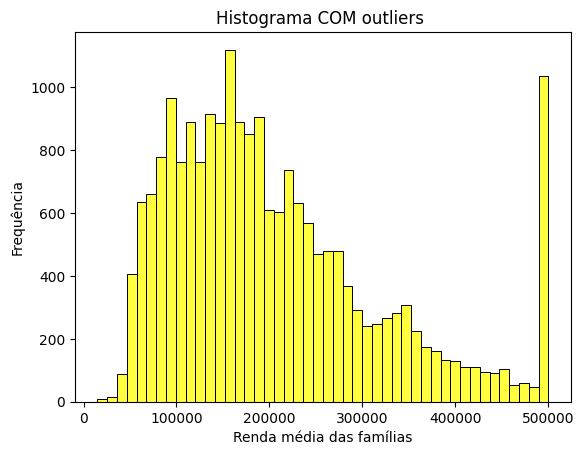

In [ ]:
# Histograma com outliers
sns.histplot(data = valor_casa, color = 'yellow')

plt.ylabel("Frequência")
plt.xlabel("Renda média das famílias")
plt.title("Histograma COM outliers ")
plt.show()


In [ ]:
# Calculando a média
media = valor_casa.mean()
print(f'Em média, o preço mediano das casas é de {round(media, 2)} dólares.')

Em média, o preço mediano das casas é de 206855.82 dólares.


In [ ]:
# Calculando a moda
moda = valor_casa.mode()
print(f'O valor que mais se repetiu é igual a {moda[0]} dólares')

O valor que mais se repetiu é igual a 500001.0 dólares


In [ ]:
# Calculando a mediana
mediana = valor_casa.median()
print(f'Metade dos valores medianos das casas estão abaixo de {round(mediana,2)} dólares.')

Metade dos valores medianos das casas estão abaixo de 179700.0 dólares.


In [ ]:
# Calculando o desvio padrão
std = valor_casa.std()
print(f'O desvio padrão dos valores é igual a {round(std,2)} dólares.')

O desvio padrão dos valores é igual a 115395.62 dólares.


In [ ]:
# Calculando o coeficiente de variação
cv = (std/media)*100
print(f'O coeficiente de variação é igual a {round(cv,2)}%, ou seja, os dados não são homogêneos.')

O coeficiente de variação é igual a 55.79%, ou seja, os dados não são homogêneos.


In [ ]:
# Calculando os quartis
q1 = valor_casa.quantile(q = 0.25)
print(f'Um quarto dos valores está abaixo de {round(q1, 2)} dólares.')

q2 = valor_casa.quantile(q = 0.50)
print(f'Metade dos valores está abaixo de {round(q2, 2)} dólares.')

q3 = valor_casa.quantile(q = 0.75)
print(f'Um quarto dos valores está acima de {round(q3, 2)} dólares.')

Um quarto dos valores está abaixo de 119600.0 dólares.
Metade dos valores está abaixo de 179700.0 dólares.
Um quarto dos valores está acima de 264725.0 dólares.


In [ ]:
# Describe geral dos dados
valor_casa.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

O limite superior máximo é igual a: 482412.5 dólares.
O limite inferior mínimo é igual a: 47037.5 dólares.
Portanto, os valores acima de 482412.5 dólares e abaixo de 47037.5 dólares são outliers.


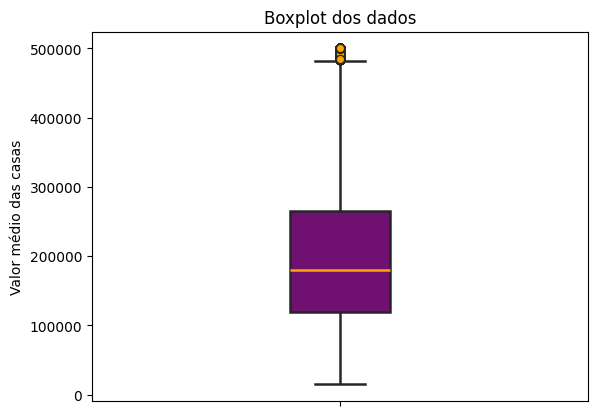

In [ ]:
# Definindo o limite para deixar os outliers de fora da base de dados
IQR = q3 - q1
max = q3 + 1.5*IQR
min = q3 - 1.5*IQR
print(f'O limite superior máximo é igual a: {max} dólares.')
print(f'O limite inferior mínimo é igual a: {min} dólares.')
print(f'Portanto, os valores acima de {round(max,2)} dólares e abaixo de {min} dólares são outliers.')

# Fazendo o boxplot
sns.boxplot(data = df['median_house_value'], width = 0.2, whis = 1.5, fliersize=2, \
linewidth=1.8, medianprops=dict(color='orange'), flierprops=dict(marker='o', markerfacecolor='orange', markersize=6,), color = 'purple')
plt.ylabel("Valor médio das casas")
plt.title("Boxplot dos dados")
plt.show()


In [ ]:
# Removendo os outliers da base de dados fazendo um recorte:
df_semOut = df[(df['median_house_value'] > min) & (df['median_house_value'] < max)]
valor_semOut = df_semOut['median_house_value']

> Cálculos sobre o ***median_house_value*** usando a base já tratada

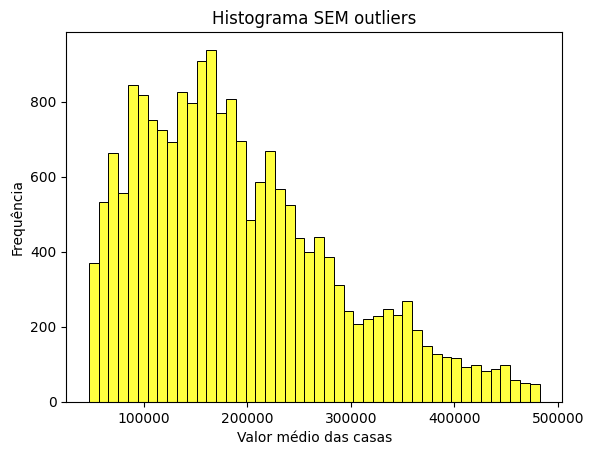

In [ ]:
# Histograma sem outliers
sns.histplot(data = valor_semOut, color = 'yellow')
plt.ylabel("Frequência")
plt.xlabel("Valor médio das casas")
plt.title("Histograma SEM outliers")
plt.show()

In [ ]:
# Calculando a nova média
media_nova = valor_semOut.mean()
print(f'A média dos valores das medianas das casas é igual a {round(media_nova,2)} dólares.')

A média dos valores das medianas das casas é igual a 191823.5 dólares.


In [ ]:
# Calculando a nova mediana
mediana_nova = valor_semOut.median()
print(f'Metade dos valores das medianas das casas estão abaixo de {round(mediana_nova,2)} dólares.')

Metade dos valores das medianas das casas estão abaixo de 173900.0 dólares.


In [ ]:
# Calculando o novo desvio padrão
std_novo = valor_semOut.std()
print(f'O desvio padrão dos valores é igual a {round(std_novo,2)} dólares.')

O desvio padrão dos valores é igual a 94968.52 dólares.


In [ ]:
# Calculando o novo coeficiente de variação
cv_novo = (std_novo/media_nova)*100
print(f'O coeficiente de variação é de {round(cv_novo,2)}%, o que indica que agora os dados variam um pouco menos do que quando a base possuía outliers.')

O coeficiente de variação é de 49.51%, o que indica que agora os dados variam um pouco menos do que quando a base possuía outliers.


In [ ]:
valor_semOut.describe()

count     19444.000000
mean     191823.503394
std       94968.524371
min       47100.000000
25%      117500.000000
50%      173900.000000
75%      247400.000000
max      482200.000000
Name: median_house_value, dtype: float64

# **Estatística Bivariada com a Variável Preço Mediano da Casa**

Nesta seção, o grupo deve investigar as possíveis relações da variável preço mediano da casa com cada uma das demais variáveis, usando conceitos da Unidade 2. Quando encontrarem uma relação, devem descrever de forma clara e mostrar como explorar essa essa relação.

In [ ]:
# Limpando dados vazios
df_semOut.dropna(axis = 0, inplace = True)

<ipython-input-23-94000d4a3e54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_semOut.dropna(axis = 0, inplace = True)


In [ ]:
# Calculando a correlação entre os dados
matrizCorr = df_semOut.corr(numeric_only = True)
matrizCorr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925270,-0.102319,0.046222,0.071092,0.103400,0.058334,-0.009741,-0.045697
latitude,-0.925270,1.000000,0.005830,-0.033387,-0.067960,-0.114333,-0.073454,-0.074102,-0.148021
housing_median_age,-0.102319,0.005830,1.000000,-0.373375,-0.329305,-0.296083,-0.311166,-0.197067,0.064717
total_rooms,0.046222,-0.033387,-0.373375,1.000000,0.934067,0.859622,0.921426,0.224260,0.143904
total_bedrooms,0.071092,-0.067960,-0.329305,0.934067,1.000000,0.879418,0.979119,0.021773,0.076117
population,0.103400,-0.114333,-0.296083,0.859622,0.879418,1.000000,0.909416,0.043640,0.014805
households,0.058334,-0.073454,-0.311166,0.921426,0.979119,0.909416,1.000000,0.045986,0.095065
median_income,-0.009741,-0.074102,-0.197067,0.224260,0.021773,0.043640,0.045986,1.000000,0.640527
median_house_value,-0.045697,-0.148021,0.064717,0.143904,0.076117,0.014805,0.095065,0.640527,1.000000


<Axes: >

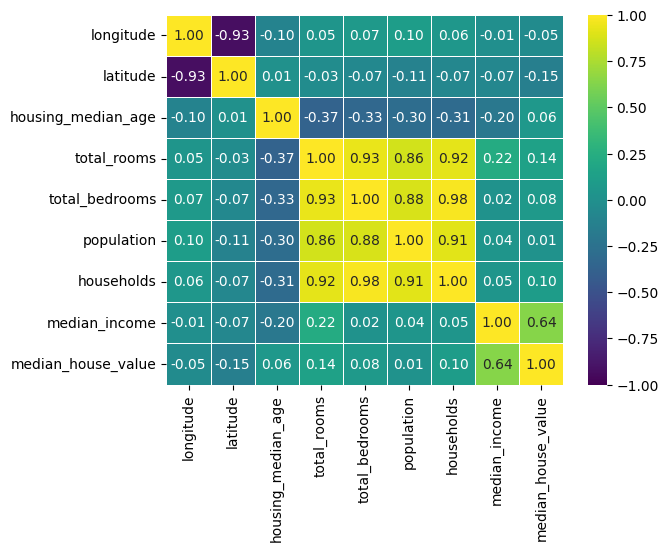

In [ ]:
# Transformando em um mapa de cor para facilitar a visualização
sns.heatmap(matrizCorr, annot = True, fmt='.2f', linewidths = 0.6, center = 0, vmin = -1, vmax = 1, cmap = 'viridis')

- Aqui comparamos as variáveis de renda mediana das famílias e o preço mediano das casas, visto que o mapa de cor indicou que elas possuem relação. Podemos perceber que, quanto maior a renda, maior era o preço da casa. Assim, famílias com melhores condições financeiras tiveram a oportunidade de comprar casas com valores mais altos.

r = 0.64, portanto existe certa correlação linear entre as duas variáveis.
Dessa forma, 41.03% do valor mediano das casas é explicado pela renda mediana das famílias. 
Os outros 58.97% se devem a outros fatores.




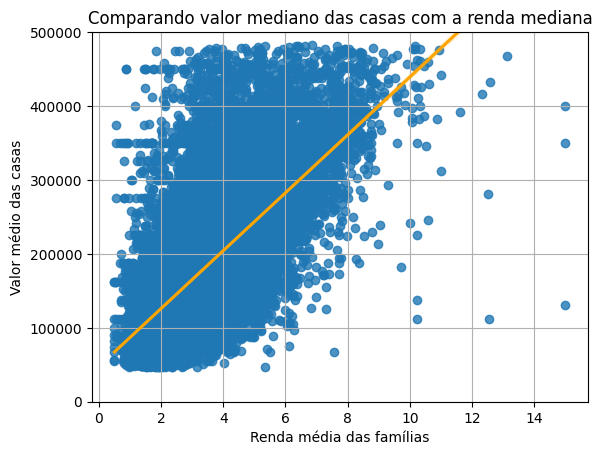

In [ ]:
# Fazendo regplot entre o valor mediano das casas e a renda mediana,
sns.regplot(data = df_semOut, x = 'median_income', y = 'median_house_value', line_kws={'color': 'orange'})
plt.ylim(0,500000)
plt.grid()

plt.ylabel("Valor médio das casas")
plt.xlabel("Renda média das famílias")
plt.title("Comparando valor mediano das casas com a renda mediana")

r = linregress(x = df_semOut.median_income, y = df_semOut.median_house_value).rvalue
print(f'r = {round(r,2)}, portanto existe certa correlação linear entre as duas variáveis.')
R2 = (r ** 2)*100
print(f'Dessa forma, {round(R2,2)}% do valor mediano das casas é explicado pela renda mediana das famílias. \nOs outros {round(100 - R2,2)}% se devem a outros fatores.\n\n')
plt.show()

In [ ]:
# Calculando a equação da reta
a = round(linregress(x = df_semOut.median_income, y = df_semOut.median_house_value).slope, 2)
b = round(linregress(x = df_semOut.median_income, y = df_semOut.median_house_value).intercept,2)
print(f'a = {a}')
print(f'b = {b}')
print(f'\nEquação da reta: y = {a}x + {b}')

a = 39151.41
b = 47779.75

Equação da reta: y = 39151.41x + 47779.75


## **Dica eventualmente útil**

Fazer um scatterplot de longitude x latitude permite visualizar a posição das casas/distritos no mapa da Califórnia. Veja abaixo.

* Aumentamos o tamanho dos pontos e colocamos cores para visualizar onde se concentram as casas mais caras, e é possível observar que essas estão mais próximas do oceano.

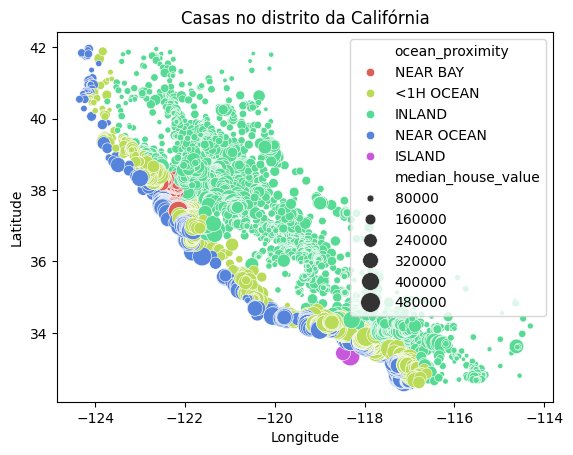

In [ ]:
sns.scatterplot(data=df_semOut, x = 'longitude', y = 'latitude', size = 'median_house_value', hue = 'ocean_proximity', sizes = (10, 200), palette = 'hls')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Casas no distrito da Califórnia")
plt.show()


* Queremos analisar qual a relação entre a quantidade de quartos das casas com o seu valor, comparando também com o sua localização (próximo do mar ou mais afastado).

- A partir do gráfico abaixo, podemos ver que mesmo que algumas casas possuam muitos quartos, quanto mais longe do oceano, menor é seu preço.

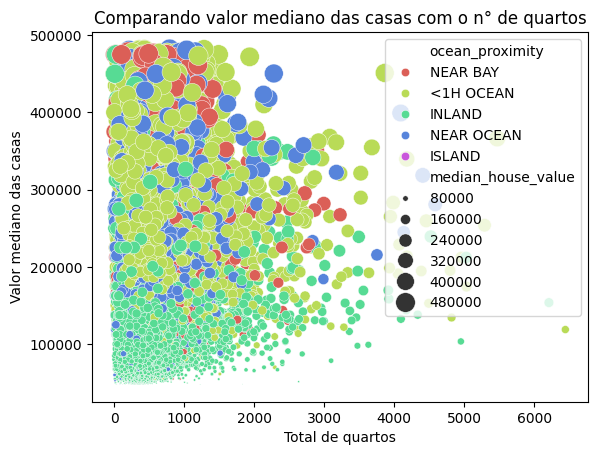

In [ ]:
sns.scatterplot(data = df_semOut, x = 'total_bedrooms', y = 'median_house_value',  palette = 'hls', hue = 'ocean_proximity', size = 'median_house_value', sizes = (0, 200))
plt.ylabel("Valor mediano das casas")
plt.xlabel("Total de quartos")
plt.title("Comparando valor mediano das casas com o n° de quartos")
plt.show()

- Agora vamos tentar descobrir que o preço da casa varia de acordo com a idade.
- É relativo. Mesmo uma casa antiga pode valer muito, assim como uma casa nova pode valer pouco.

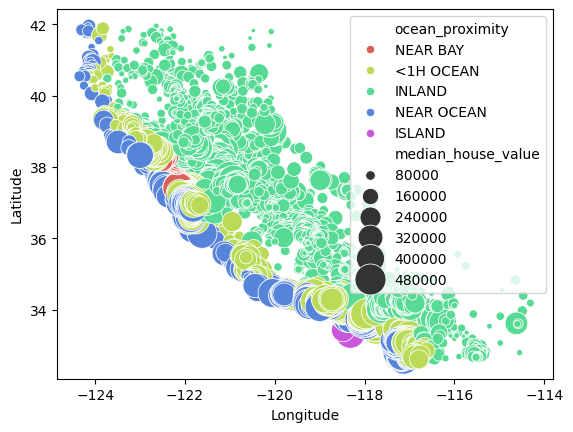

In [ ]:
sns.scatterplot(data=df_semOut, x = 'longitude', y = 'latitude', size = 'median_house_value', hue = 'ocean_proximity', sizes = (10, 500), palette = 'hls')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

# **Conclusão**
De maneira geral, observamos que as variáveis que mais influenciam o preço mediano das casas é a renda familiar, ou seja, quanto maior a condição financeira da família, maior é o preço da casa. Isso também se conecta ao fato de que casas no litoral da Califórnia são mais valorizadas, ainda que a quantidade de quartos seja menor do que a de uma casa com mais quartos, porém longe do oceano.
Observamos também que a inclusão dos outliers nos dados foi crucial para uma análise mais aprofundada. A presença de uma moda elevada na região litorânea revelou uma tendência importante: as casas no litoral são significativamente mais caras. Essa descoberta é reforçada pela visualização bruta dos dados, ou seja, que inclui esses valores extremos (nossos outliers), permitindo identificar padrões específicos no valor mediano das casas. Sem esses dados, a análise das casas localizadas no interior poderia ser mais simples, omitindo assim os detalhes críticos que caracterizam o mercado imobiliário de áreas costeiras. A análise inclusiva dos outliers foi eficiente para entendermos os valores elevados nas regiões litorâneas. Além também, de destacar que a proximidade à baia é um fator de valorização, podendo desconsiderar outras variáveis, como o n° de quartos nas casas localizadas nas regiões do interior.